<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Evaluacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Evaluación 1***
"Análisis de Series de Tiempo" 

---

Esta evaluación consiste en construir y analizar series de tiempo acerca de la concentracion de CO2 en la atmosfera a partir de los datos proporcionados por los Laboratorios de Investigación del Sistema Tierra de la agencia NOAA (ESRL NOAA). Para esto se utilizaran las herramientas estadisticas que se han venido manejando en actividades anteriores como lo son las bibliotecas ksjdhaksjh, asjkhdkjsa, hajskhd ademas de construir gráficas que nos ayuden a visualizar dicha información.
Una vez que se analizo exitosamente dicha información se buscará crear una serie de tiempo estacionaria, esto quiere decir que sus propiedades estadísticas como promedio, varianza, covarianza y muchas otras permanezcan constantes a lo largo del tiempo, en la cual nos podamos basar para posteriormente elaborar una pronostico de información aceptable. 

*   # ***Parte 1.*** 
Construccion de una Serie de Tiempo. Para esta primera parte lo que haremos es construir una serie de tiempo desde el principio, esto quiere decir que deberemos elaborar adecuadamente el DataFrame de información que sirva como base para la elaboración de la serie.

In [59]:
#Aqui introducimos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm
#Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

import pandas.util.testing as tm

#Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [10]:
#Construimos el DataFrame de los datos de concentración de C02 del Observatorio de Mauna Loa, Hawaii
#Definimos como la direccion url donde se ubica nuestro archivo
url="https://raw.githubusercontent.com/GerardoxCarreon/FisicaComputacional1/master/Evaluacion1/Hawaii-DailyC02.txt"
#Definimos manualmente los nombres para nuestras columnas mediante la función my_cols
my_cols=[ 'Site_code','Year','Month','Day','Hour','Minute','Second','Time_decimal','Value','Value_std_dev','nValue','Latitude','Longitude','Altitude','Elevation','Intake_height','gcflag' ]
#Definimos nuestro archivo como un csv con parametros para poder leerlo como Dataframe 
df_CO2=pd.read_csv(url, names=my_cols, encoding='cp1252', sep='\s+', header=None, skiprows=152, skip_blank_lines=True, engine='python')
#names=my_cols: Para nombrar a las columnas con los nombres que acabamos de definir
#encoding='cp1252': Parametro obligatorio para que se puedan leer archivos escritos en español
#sep='\s+': Indica que el metodo por el cual se separa la informacion es por espacios
#header:None: Le indica al archivo que ignore el encabezado del archivo 
#skiprows=152: Se saltan los primeros 19 renglones y de ahi se empiezan a leer los datos
#skipfooter=1: Le indica al archivo que no lea o ignore el ultimo renglon del archivo a leer
#skip_blank_lines=True: Se saltan o ignoran los espacios en blanco del archivo
#engine='python': Indica el el lenguaje de programacion con el que se va a leer el archivo

#Nuestro archivo esta listo para ser leido 

In [11]:
#Se imprimiran los primeros y ultimos 5 renglones de la tabla de datos
print('ENCABEZADO DE DATAFRAME\n')
print(df_CO2.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_CO2.tail())
print('INFORMACION DE DATAFRAME\n')
df_CO2.info()

ENCABEZADO DE DATAFRAME

  Site_code  Year  Month  Day  ...  Altitude  Elevation  Intake_height  gcflag
0       MLO  1973      1    1  ...    3437.0     3397.0           40.0     *..
1       MLO  1973      1    2  ...    3437.0     3397.0           40.0     *..
2       MLO  1973      1    3  ...    3437.0     3397.0           40.0     *..
3       MLO  1973      1    4  ...    3437.0     3397.0           40.0     *..
4       MLO  1973      1    5  ...    3437.0     3397.0           40.0     *..

[5 rows x 17 columns]

PIE DE DATAFRAME

      Site_code  Year  Month  Day  ...  Altitude  Elevation  Intake_height  gcflag
17161       MLO  2019     12   27  ...    3437.0     3397.0           40.0     ...
17162       MLO  2019     12   28  ...    3437.0     3397.0           40.0     ...
17163       MLO  2019     12   29  ...    3437.0     3397.0           40.0     ...
17164       MLO  2019     12   30  ...    3437.0     3397.0           40.0     ...
17165       MLO  2019     12   31  ...    34

In [12]:
#Realizamos una copia de este DataFrame para conservar el original
df_CO2_cop=df_CO2

In [22]:
#Ahora lo que buscamos es agregar una columna de 'Fecha' la cual tendra informacion del dia, mes y año almacenada en formato datetime
df_CO2_cop1=pd.DataFrame(df_CO2_cop,columns=['Year','Month','Day'])
df_CO2_cop1['Fecha']=pd.to_datetime(df_CO2_cop1)
df_CO2_cop2=pd.DataFrame(df_CO2_cop1,columns=['Fecha'])
df_CO2_cop2['Valor CO2']=df_CO2['Value']

In [23]:
#Ahora se buscara reemplazar los valores nulos (-999.99) de la columna Value
str_Nulo=-999.99 
df_CO2_cop2=df_CO2_cop2.replace(to_replace=str_Nulo, value='NaN', regex=True) 

In [24]:
#Se imprimiran el encabezado, pie e informacion del nuevo DataFrame para comprobar que todo este en orden
print('ENCABEZADO DE DATAFRAME\n')
print(df_CO2_cop2.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_CO2_cop2.tail())
print('INFORMACION DE DATAFRAME\n')
df_CO2_cop2.info()

ENCABEZADO DE DATAFRAME

       Fecha Valor CO2
0 1973-01-01       NaN
1 1973-01-02       NaN
2 1973-01-03       NaN
3 1973-01-04       NaN
4 1973-01-05       NaN

PIE DE DATAFRAME

           Fecha Valor CO2
17161 2019-12-27    412.85
17162 2019-12-28    412.34
17163 2019-12-29    412.98
17164 2019-12-30     413.3
17165 2019-12-31    413.43
INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17166 entries, 0 to 17165
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      17166 non-null  datetime64[ns]
 1   Valor CO2  17166 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 268.3+ KB


In [25]:
#Convertimos la columna de valor co2 a numerico 
df_CO2_cop2['valor CO2']=pd.to_numeric(df_CO2_cop2['Valor CO2'],errors='coerce')
#Ahora procedemos a convertir la columna de Fecha en el indice del DataFrame y tambien limitamos el intervalo desde el año 1980 hasta 2019
df_CO2_cop2=df_CO2_cop2.set_index('Fecha')
#Periodo de tiempo del intervalo
start, end = '1980-01', '2019-12' 
df_CO2_cop3=df_CO2_cop2.loc[start:end].copy()

In [28]:
#Creamos la serie de tiempo con la que se trabajara 
ts_test=df_CO2_cop3['Valor CO2'] 
#Se conviertes los valores del dataFrame a flotantes
ts_test = ts_test.astype(float)
#Se llenan los espacios vacios de datos recorriendo los datos ya obtenidos
ts_test.ffill(axis = 0, inplace=True)
#Se imprimiran el encabezado y pie del DataFrame para comprobar que todo este en orden
print('ENCABEZADO DE DATAFRAME\n')
print(ts_test.head())
print('')
print('PIE DE DATAFRAME\n')
print(ts_test.tail())

ENCABEZADO DE DATAFRAME

Fecha
1980-01-01    337.85
1980-01-02    337.32
1980-01-03    337.75
1980-01-04    337.70
1980-01-05    337.65
Name: Valor CO2, dtype: float64

PIE DE DATAFRAME

Fecha
2019-12-27    412.85
2019-12-28    412.34
2019-12-29    412.98
2019-12-30    413.30
2019-12-31    413.43
Name: Valor CO2, dtype: float64


*   # ***Parte 2.*** 
En esta segunda parte, se tomara la serie de datos en el periodo indicado y se probara si es una serie de tiempo estacionaria o hacer las transformaciones para convertirla en una. Además, se construiran los modelos ARIMA para los datos de CO2, y se contrastara la bondad del ajuste en cada caso, calculando el error de la raíz cuadrada promedio RMSE y sobreponiendo gráficamente ambas series, la observada y la construida con el método ARIMA.

In [29]:
#Definimos la función que probara si nuestra serie de tiempo es estacionaria: 'timeseries'
def test_stationarity(df_ts):
    #Determinar la Estadística de promedios móviles
    rolmean=df_ts.rolling(window=365, center=True).mean()
    rolstd=df_ts.rolling(window=365, center=True).std() 
    # Define el tamaño de la figura
    plt.rcParams["figure.figsize"] = (12,6)
    #Graficar la Estadística de promedios móviles 
    plt.plot(df_ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
    #Etiquetas de ejes y titulo 
    plt.legend(loc='best')
    plt.title('Promedio Móvil y Desviación Estándar')
    plt.grid()
    plt.show()
    #Realiza la Prueba Aumentada de Dickey-Fuller:
    print('Resultados de la Prueba de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

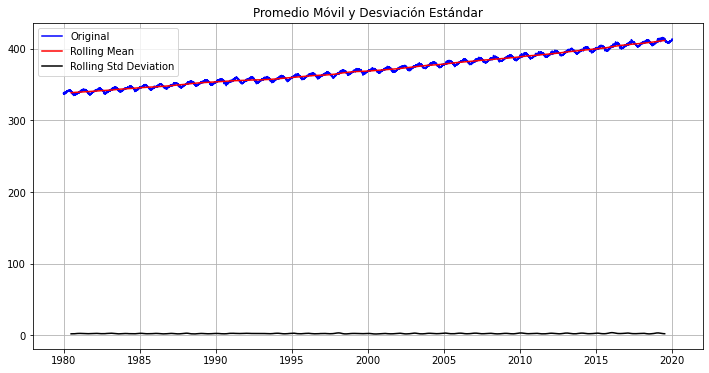

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                    -1.014427
p-value                            0.747966
#Lags Used                        42.000000
Number of Observations Used    14567.000000
Critical Value (1%)               -3.430799
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566876
dtype: float64


In [30]:
#Realizamos la prueba de estacionalidad con el metodo de Dickey-Fuller para la serie de Concentracion ed CO2 y analizamos la información obtenida
test_stationarity(ts_test)

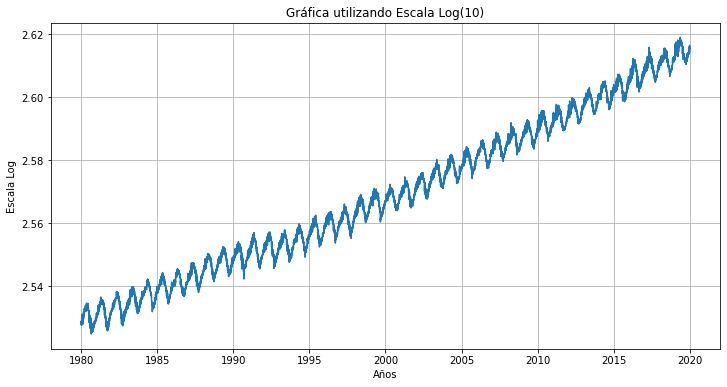

In [31]:
#Como el valor obtenido de p es mayor que 0.05 procederemos a cambiar la escala a logaritmica
ts_test_log=np.log10(ts_test)
plt.plot(ts_test_log)
plt.xlabel('Años')
plt.ylabel('Escala Log')
plt.title('Gráfica utilizando Escala Log(10)')
plt.grid()
plt.show();

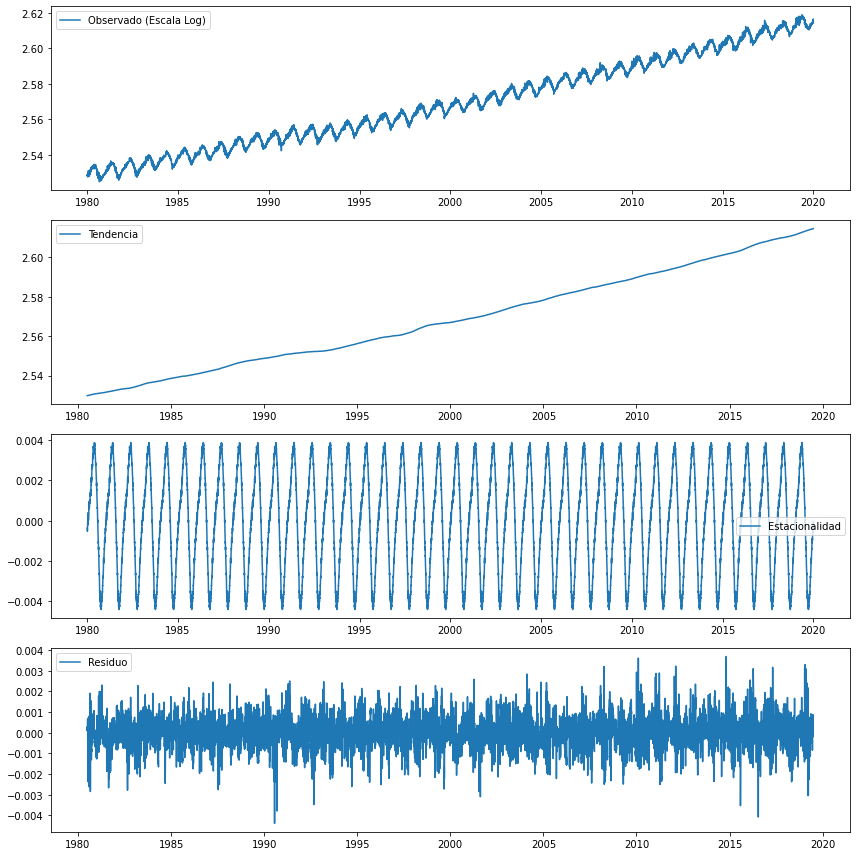

In [32]:
#Procedemos a descomponer la serie 'ts_test_log', usando interpolación y promedio móvil de 365 días ademas de realizar las gráficas para su visualizacion
#Utilizando la biblioteca statsmodels.tsa
decomposition = sm.tsa.seasonal_decompose(ts_test_log.interpolate(), model='additive', freq=365)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residue = decomposition.resid 
#Dimensiones de la graficas
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(ts_test_log, label='Observado (Escala Log)') 
plt.legend(loc='best')
#Gráfica de tendencia
plt.subplot(412)
plt.plot(trend, label='Tendencia') 
plt.legend(loc='best')
#Gráfica de estacionalidad
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad') 
plt.legend(loc='best')
#Gráfica de residuo
plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')
plt.tight_layout(); 

In [35]:
#Describimos el comportamiento de las gráficas

Gráfica de Tendencia: podemos observar que la gráfica crece constantemente y casi de manera lineal

Gráfica de Estacionalidad: en esta gráfica podemos apreciar que efectivamente hay un ciclo que se repite a lo largo del tiempo 

Gráfica de Residuo: podemos observar que la variabilidad es relativamente poca en los primeros años y aumenta gradualmente en los ultimos años

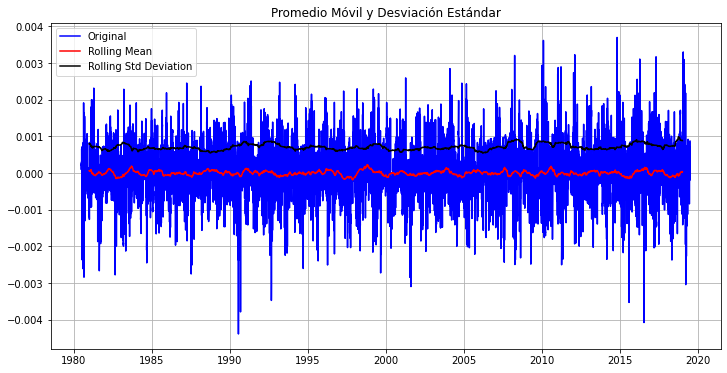

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                   -19.156045
p-value                            0.000000
#Lags Used                        21.000000
Number of Observations Used    14224.000000
Critical Value (1%)               -3.430810
Critical Value (5%)               -2.861743
Critical Value (10%)              -2.566878
dtype: float64


In [37]:
#Eliminamos la Tendencia y Estacionalidad para posteriormente probar si la serie Residuo es estacionaria
ts_test_log_decompose=residue 
ts_test_log_decompose.dropna(inplace=True) 
test_stationarity(ts_test_log_decompose) 

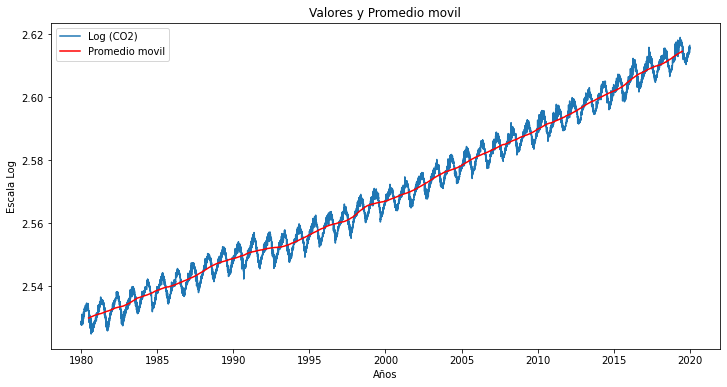

In [42]:
#Promedio móvil centrado sobre 'ts_test_log' usando un periodo de 365 días y contrastado en una gráfica con la serie de Log CO2.
moving_avg = ts_test_log.rolling(365, center=True).mean() 
plt.plot(ts_test_log, label='Log (CO2)');
plt.plot(moving_avg, label='Promedio movil',color='red');
plt.xlabel('Años')
plt.ylabel('Escala Log')
plt.title('Valores y Promedio movil')
plt.legend(loc='best');

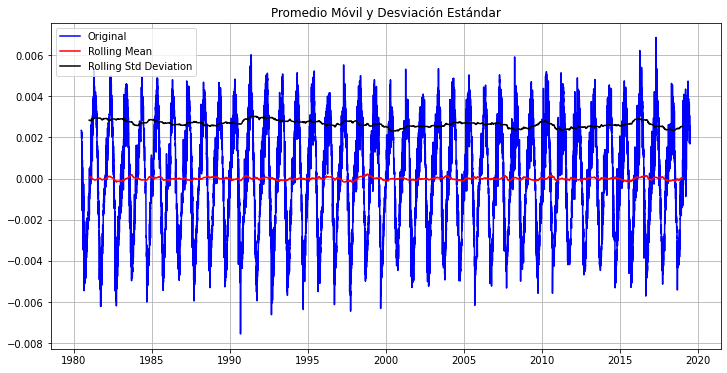

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.400423e+01
p-value                        3.813700e-26
#Lags Used                     4.200000e+01
Number of Observations Used    1.420300e+04
Critical Value (1%)           -3.430811e+00
Critical Value (5%)           -2.861744e+00
Critical Value (10%)          -2.566878e+00
dtype: float64


In [43]:
#Se define un nuevo dataframe con la diferencia entre la serie logaritmo original y el promedio móvil, y se prueba después su estacionaridad.
ts_test_log_moving_ave_diff =ts_test_log - moving_avg
#Removemos los datos sin valor 
ts_test_log_moving_ave_diff.dropna(inplace=True) 
ts_test_log_moving_ave_diff.head()
test_stationarity(ts_test_log_moving_ave_diff) 

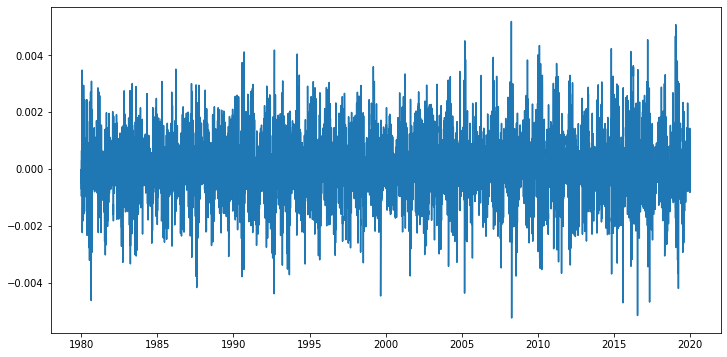

In [44]:
#Se construye una serie estacionaria usando la función de diferenciación shift con un periodo de 7 días, que utiliza menos puntos que el promedio móvil.
ts_test_log_diff=ts_test_log - ts_test_log.shift(periods=7)
ts_test_log_diff.dropna(inplace=True)
plt.plot(ts_test_log_diff);

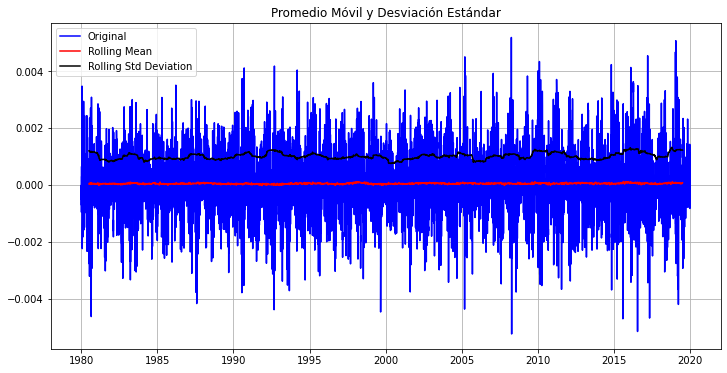

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.002234e+01
p-value                        1.666271e-17
#Lags Used                     4.200000e+01
Number of Observations Used    1.456000e+04
Critical Value (1%)           -3.430799e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [46]:
#Probamos la estacionaridad de la serie usando diferenciacion shift con un periodo de 7 dias
ts_test_log_diff.dropna(inplace=True)
test_stationarity(ts_test_log_diff)

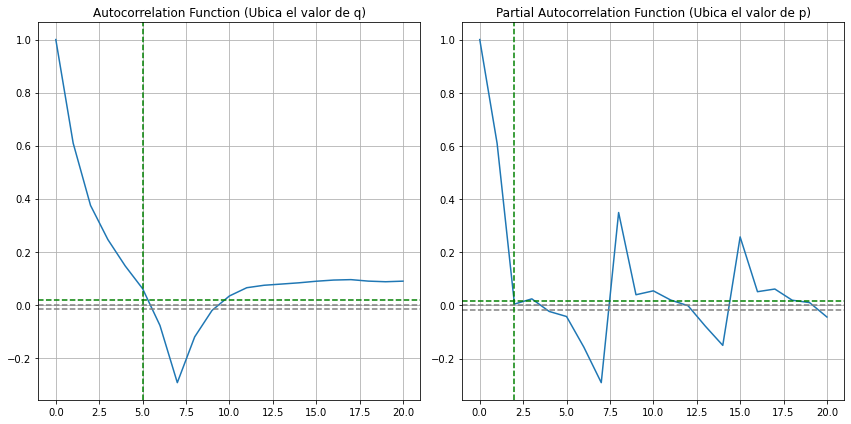

In [77]:
#Ya que hemos confirmado que obtuvimos una serie de tiempo estacionaria, construiremos un modelo utilizando diferenciación, porque es fácil añadir el error, la tendencia y la estacionalidad a las predicciones.
#Utilizaremos el método ARIMA para el pronostico de la Serie de Tiempo 
lag_acf = acf(ts_test_log_diff, nlags=20)
lag_pacf = pacf(ts_test_log_diff, nlags=20, method = 'ols')
#Tamaño de la gráficas
plt.rcParams["figure.figsize"] = (12,6)
#Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
#Graficamos unas líneas verticales como referencias que representan los intervalos de confianza
plt.axvline(x=5, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')
#Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
#Graficamos unas líneas verticales como referencias que representan los intervalos de confianza
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

In [48]:
#p es donde cruza el PACF el primer nivel de confianza superior, que en la gráfica derecha es cercana a 2, por lo que p=2.
#q es donde cruza la ACF el primer nivel de confianza superior, que en la gráfica izquierda es cercana a 5, por lo que haremos q=5.
#Con estos dos valores construiremos los modelos ARIMA correspondientes.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Valor CO2   No. Observations:                14609
Model:                 ARIMA(2, 1, 0)   Log Likelihood               87409.900
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -174811.800
Time:                        05:47:48   BIC                        -174781.442
Sample:                    01-02-1980   HQIC                       -174801.715
                         - 12-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.005e-06   3.53e-06      1.703      0.089   -9.05e-07    1.29e-05
ar.L1.D.Valor CO2    -0.2437      0.008    -29.992      0.000      -0.260      -0.228
ar.L2.D.Valor CO2    -0.

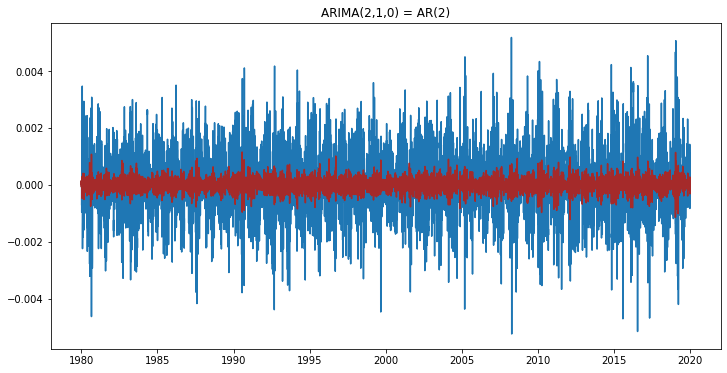

In [62]:
#Modelo de ARIMA (Auto-Regresion)
#Modelo AR(p): (p,d,q) = (2,1,0) 
model=ARIMA(ts_test_log, order=(2,1,0), missing='drop')
results_AR=model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

In [50]:
AR='AR: AIC =-174811.800'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Valor CO2   No. Observations:                14609
Model:                 ARIMA(0, 1, 5)   Log Likelihood               87739.011
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -175464.022
Time:                        05:47:56   BIC                        -175410.897
Sample:                    01-02-1980   HQIC                       -175446.373
                         - 12-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.985e-06   2.07e-06      2.897      0.004    1.94e-06       1e-05
ma.L1.D.Valor CO2    -0.3032      0.008    -36.629      0.000      -0.319      -0.287
ma.L2.D.Valor CO2    -0.

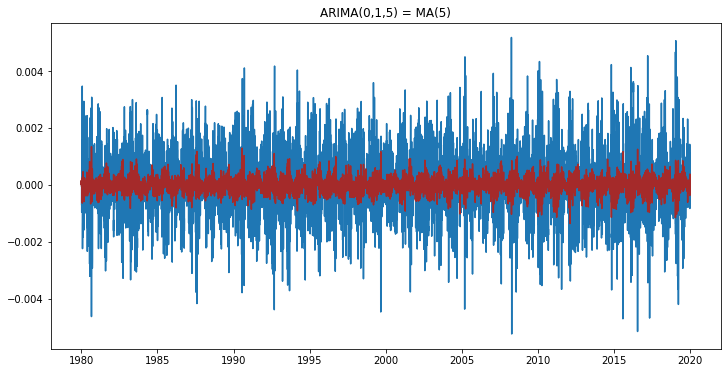

In [63]:
#Ahora utilizaremos el Modelo del Promedio Movil
#Modelo MA(q): (p,d,q) = (0,1,5) 
model = ARIMA(ts_test_log, order=(0,1,5), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,5) = MA(5)')
print(results_MA.summary())

In [66]:
MA='MA: -175464.022'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Valor CO2   No. Observations:                14609
Model:                 ARIMA(2, 1, 5)   Log Likelihood               87745.943
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 25 Feb 2021   AIC                        -175473.885
Time:                        05:49:18   BIC                        -175405.581
Sample:                    01-02-1980   HQIC                       -175451.194
                         - 12-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.988e-06   2.17e-06      2.761      0.006    1.74e-06    1.02e-05
ar.L1.D.Valor CO2     0.4232      0.262      1.615      0.106      -0.090       0.937
ar.L2.D.Valor CO2     0.

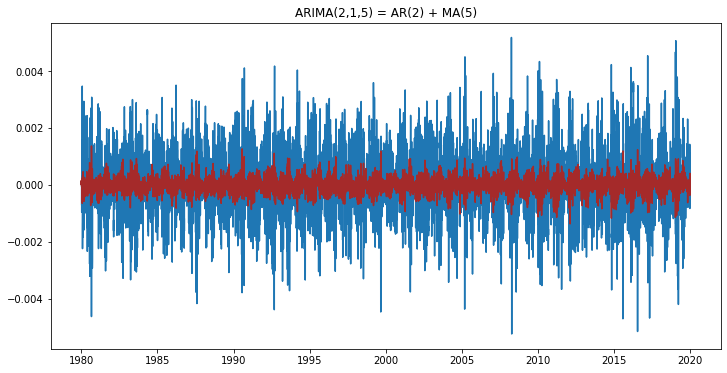

In [65]:
#Modelo ARIMA de Auto-Regresion + Promedio Movil
#Modelo ARIMA(p): (p,d,q) = (2,1,5) 
model=ARIMA(ts_test_log, order=(2,1,5), missing='drop')
results_ARIMA=model.fit(displ=-1)
#Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(ts_test_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,5) = AR(2) + MA(5)')
print(results_ARIMA.summary())

In [70]:
ARIMA='ARIMA: AIC =-175485.271'

In [71]:
#Para definir cual de los metodos ARIMA anteriores es el mejor indicador nos fijaremso en un criterio, este es El Criterio de Información de Akaike (AIC)
#El criterio AIC se basa en dos principios:
#Bondad del ajuste y Simplicidad del modelo o principio de parsimonia.
#Aquel modelo que tenga el menor AIC, y los valores más pequeños de (p,d,q) se selecciona como el mejor modelo de ajuste.
#Imprimimos los valores de AIC de los distintos modelos
print('AIC de los distintos modelos:')
print(AR,';',MA,';',ARIMA)

AIC de los distintos modelos:
AR: AIC =-174811.800 ; MA: -175464.022 ; ARIMA: AIC =-175485.271


In [68]:
#Podemos concluir que el mejor modelo es el de ARIMA (Auto-regresion + Promedio movil) con un AIC de -175485.271
print('ARIMA(2,1,5)=-175485.271 , ARIMA con el AIC más pequeño')

ARIMA(2,1,5)=-175485.271 , ARIMA con el AIC más pequeño


In [72]:
#Finalmente, definimos una serie de tiempo con las predicciones obtenidas por el método ARIMA
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Fecha
1980-01-02    5.988156e-06
1980-01-03    1.460652e-04
1980-01-04    4.006018e-06
1980-01-05    5.603468e-07
1980-01-06    3.863557e-05
                  ...     
2019-12-27   -2.820778e-05
2019-12-28   -1.976747e-04
2019-12-29    4.607450e-05
2019-12-30   -2.193314e-04
2019-12-31   -2.403775e-04
Length: 14609, dtype: float64


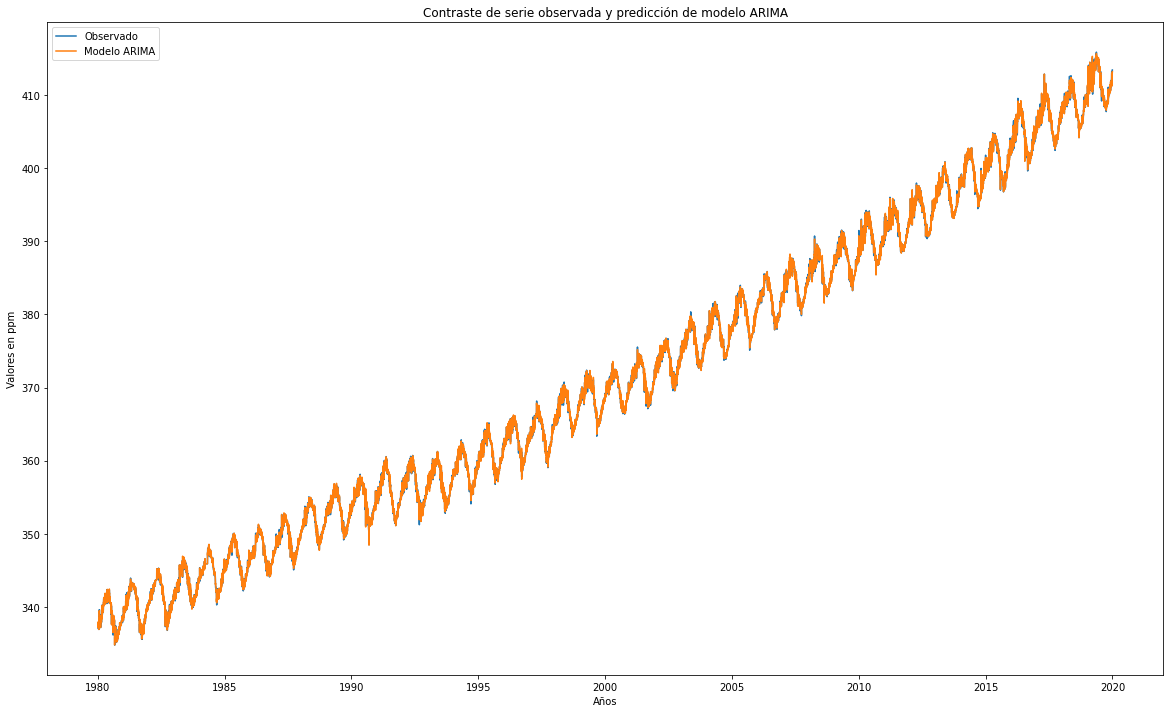

In [76]:
#En este paso se realizara un contraste entre la serie observada de la concentracion de CO2 y la construida por el metodo de ARIMA
predictions_ARIMA_log=pd.Series(ts_test_log, index=ts_test_log.index) 
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff) 
#Se regresa a la escala original, dejando la escala logaritmica
predictions_ARIMA = 10**(predictions_ARIMA_log)
#Dimensiones de la gráfica
plt.rcParams["figure.figsize"] = (20,12)
#Etiquetas de ejes y titulo
plt.plot(ts_test, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Años')
plt.ylabel('Valores en ppm')
plt.title('Contraste de serie observada y predicción de modelo ARIMA')
plt.legend(loc='best');

In [74]:
#Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)
RMSE=np.sqrt(np.mean((predictions_ARIMA-ts_test)**2))
print('\033[1m','El error de la Raiz Cuadrada de la Media es:', '\033[0m', RMSE)

 El error de la Raiz Cuadrada de la Media es:  0.1906407072380998


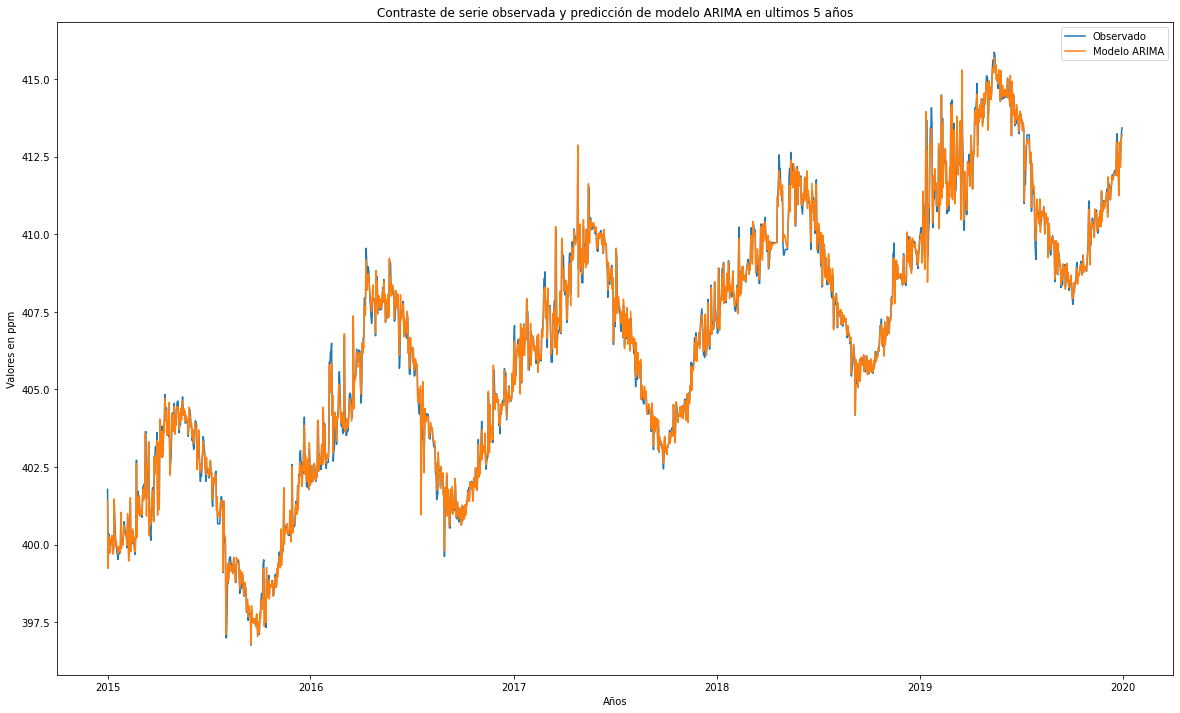

In [75]:
#Por último contrasta los 5 últimos años de la Serie de CO2 y el modelo ARIMA para ver mas a detalles el modelo.
start, end = '2015-01', '2019-12' 
ts_test_5 = ts_test.loc[start:end].copy()
predictions_ARIMA_5 = predictions_ARIMA.loc[start:end].copy()
#Dimensiones de la gráfica
plt.rcParams["figure.figsize"] = (20,12)
#Etiquetas de ejes y titulo
plt.plot(ts_test_5, label='Observado');
plt.plot(predictions_ARIMA_5, label='Modelo ARIMA');
plt.xlabel('Años')
plt.ylabel('Valores en ppm')
plt.title('Contraste de serie observada y predicción de modelo ARIMA en ultimos 5 años')
plt.legend(loc='best');